In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def metropolis_hastings(p, dim, iter=1000):
    x = np.zeros(dim)
    samples = np.zeros((iter, dim))

    for i in range(iter):
        x_next = x + np.random.multivariate_normal(np.zeros(dim), np.eye(dim))
        r = min(1, p(x_next) / p(x))
        if np.random.rand() < r:
            x = x_next
        samples[i] = x

    return samples

In [23]:
def multivariate_gaussian(x, mu, sigma):
    k = x.shape[0]
    return 1/(np.sqrt((2*np.pi)**k * LA.det(sigma))) * np.exp(-1/2 * np.dot(np.dot((x-mu).T, LA.inv(sigma)), x-mu))

In [37]:
f = lambda x: multivariate_gaussian(x, mu=np.array([0., 0.]), sigma=np.array([[1, 0], [0, 1]]))
X = metropolis_hastings(f, 2)

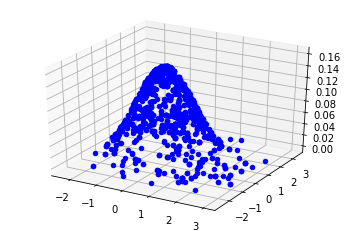

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for x in X:
    y = f(x)
    ax.scatter(x[0], x[1], y, color="b")